In [17]:
import os
import keras
import numpy as np
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import Model
from keras.applications import VGG16
import DeepImageSearch

In [18]:
image_path  = "../California/Photos/"

In [19]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [20]:
weights = 'imagenet'
model = VGG16(weights=weights, include_top=True)

In [21]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
import matplotlib.pyplot as plt

def load_image(image_path):
    img = image.load_img(image_path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

shape of x:  (1, 224, 224, 3)
data type:  float32


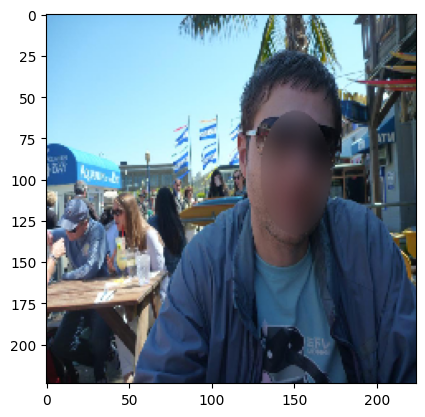

In [23]:
import matplotlib.pyplot as plt

img, x = load_image("../California/Photos/001.jpg")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [24]:
# forward the image through the network
predictions = model.predict(x)

# print out the 
for _, pred, prob in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred, prob))

1/1 [==============================] - 0s 197ms/step
predicted sunglasses with probability 0.078
predicted hotdog with probability 0.059
predicted sunscreen with probability 0.044
predicted sunglass with probability 0.044
predicted ear with probability 0.028


In [25]:

feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

1/1 [==============================] - 0s 148ms/step


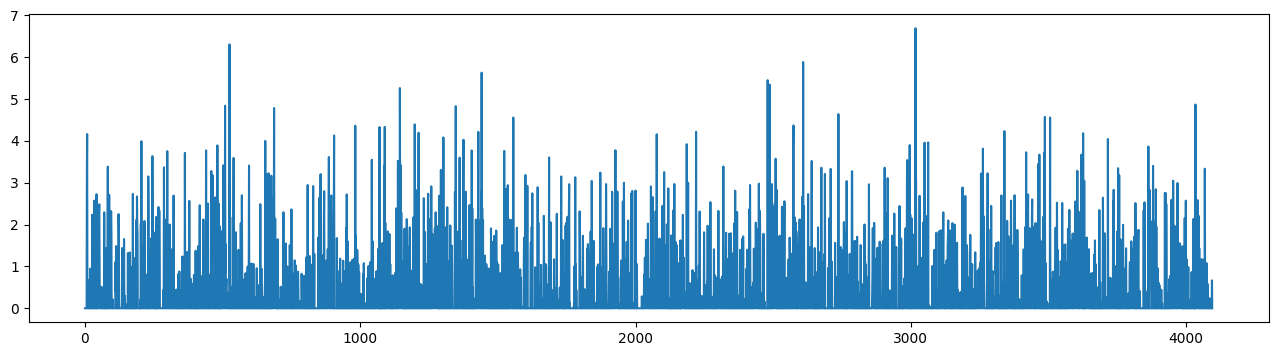

In [26]:

img, x = load_image("../California/Photos/001.jpg")
feat = feat_extractor.predict(x)

plt.figure(figsize=(16,4))
plt.plot(feat[0])

In [27]:
images_path = '../California/Photos/'
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 701 images to analyze


In [29]:
import time

tic = time.perf_counter()

features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        toc = time.perf_counter()
        elap = toc - tic
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images), elap))
        tic = time.perf_counter()
    img, x = load_image(image_path)
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(images))


analyzing image 0 / 701. Time: 0.0001 seconds.
1/1 [==============================] - 0s 102ms/step
analyzing image 500 / 701. Time: 58.7793 seconds.
1/1 [==============================] - 0s 99ms/step
finished extracting features for 701 images
